In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata=pd.read_csv('tweets_train.csv')
testdata=pd.read_csv('tweets_test.csv')

In [3]:
traindata.shape, testdata.shape

((7613, 5), (3263, 4))

In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
traindata.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Checking the Missing Value

In [6]:
total=traindata.isnull().sum().sort_values(ascending=False)
percent=(traindata.isnull().sum()/traindata.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1 ,keys=['total','percent'])
print('Missin values in train data\n')
missing

Missin values in train data



,total,percent
location,2533,0.332720
keyword,61,0.008013
id,0,0.000000
text,0,0.000000
target,0,0.000000


In [7]:
total=testdata.isnull().sum().sort_values(ascending=False)
percent=(testdata.isnull().sum()/testdata.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1 ,keys=['total','percent'])
print('Missin values in test data\n')
missing

Missin values in test data



,total,percent
location,1105,0.338645
keyword,26,0.007968
id,0,0.000000
text,0,0.000000


/home/wasim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

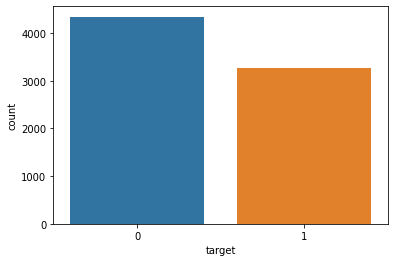

In [8]:
sns.countplot(traindata.target)

In [9]:
X_Test=testdata.text

In [10]:
x=traindata.iloc[:,3]
y=traindata.iloc[:,-1]

In [11]:
x.shape ,y.shape

((7613,), (7613,))

In [12]:
x

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

### Cleaning the data

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/wasim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def preprocessing(x):
    corpus=[]
    for i in range(0,x.shape[0]):
        tweet=re.sub('[^a-zA-Z]',' ',x[i])
        tweet=tweet.lower()
        tweet=tweet.split()
        all_stopword=stopwords.words('english')
        all_stopword.remove('not')
        ps=PorterStemmer()
        tweet=[ps.stem(word) for word in tweet if not word in set(all_stopword)]
        tweet=' '.join(tweet)
        corpus.append(tweet)
    return corpus

In [15]:
corpus_train=preprocessing(x)
corpus_test=preprocessing(X_Test)

### Using CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus_train).toarray()
X_Test=cv.fit_transform(corpus_test).toarray()

In [17]:
x.shape ,X_Test.shape

((7613, 1500), (3263, 1500))

### Modeling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [19]:
Log_reg=LogisticRegression()
GNB=GaussianNB()
MNB=MultinomialNB()
RFC=RandomForestClassifier(max_depth=10)

In [20]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [21]:
model=[Log_reg , GNB , MNB ,RFC]

In [22]:
def classification(model,x_train,x_test,y_train,y_test):
    CrossVal=cross_val_score(model ,x_train,y_train ,cv=5,scoring='accuracy')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model)
    print('CrossValidation score:',CrossVal.mean())
    print('Test Classification report:\n',classification_report(y_pred,y_test))
    print('Test Counfusion Matrix:\n' ,confusion_matrix(y_pred,y_test))

In [23]:
for i in model:
    classification(i , x_train,x_test,y_train,y_test)

LogisticRegression()
CrossValidation score: 0.7862068965517242
Test Classification report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       942
           1       0.70      0.78      0.74       581

    accuracy                           0.79      1523
   macro avg       0.78      0.79      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Test Counfusion Matrix:
 [[748 194]
 [126 455]]
GaussianNB()
CrossValidation score: 0.7619047619047619
Test Classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1035
           1       0.62      0.82      0.71       488

    accuracy                           0.78      1523
   macro avg       0.76      0.79      0.77      1523
weighted avg       0.81      0.78      0.79      1523

Test Counfusion Matrix:
 [[788 247]
 [ 86 402]]
MultinomialNB()
CrossValidation score: 0.7888341543513957
Test Classificat

### Using  Term Ferquency Invers Document Frequency

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf=TfidfVectorizer(max_features=2500 ,sublinear_tf=True)


In [26]:
x_1=tfidf.fit_transform(corpus_train).toarray()
X_Test_1 =tfidf.fit_transform(corpus_test).toarray()

In [27]:
x_train,x_test,y_train,y_test=tts(x_1,y,test_size=0.2,random_state=42)

In [28]:
for i in model:
    classification(i , x_train,x_test,y_train,y_test)

LogisticRegression()
CrossValidation score: 0.7934318555008211
Test Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       963
           1       0.70      0.81      0.75       560

    accuracy                           0.80      1523
   macro avg       0.79      0.80      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Test Counfusion Matrix:
 [[767 196]
 [107 453]]
GaussianNB()
CrossValidation score: 0.6950738916256158
Test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       761
           1       0.77      0.65      0.71       762

    accuracy                           0.73      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.73      0.73      0.73      1523

Test Counfusion Matrix:
 [[611 150]
 [263 499]]
MultinomialNB()
CrossValidation score: 0.8014778325123153
Test Classificat

As per Classification Report we get More accuracy if use Multinomial Naive Bayes

In [30]:
y_predict= MNB.predict(X_Test_1)

In [31]:
submission = pd.read_csv('sample_submission.csv')


In [34]:
submission.iloc[:, 1] = y_predict
submission.to_csv('submission.csv', index=False)